In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_excel('./EdgeContour2.xls')
#df = pd.read_excel('./EdgeContour1.xls')
# df = pd.read_excel('./circle.xlsx')

In [2]:
print("data shape:", df.shape)

data shape: (3624, 2)


In [3]:
X=df.iloc[:,0]
Y=df.iloc[:,1]
# print("X")
# Y.head(5)
# df.head(5)

# 标注列

In [4]:

df.insert(2, 'radious', 0)#column 2
df.insert(3, 'curve', 0)#column 3
df.insert(4, 'G_radious', 0)#column 4
df.insert(5, 'G_curve', 0)
df.insert(6, 'gradient_curve', 0)
df.insert(7, 'G_gradient_curve', 0)
df.insert(8, 'breakpoint', 0)#column 8
df.insert(9, 'mean_curve', 0)
df.insert(10, 'marker', 0)
# df.insert(11, 'breaklist', 0)


# 海伦公式计算曲率

In [5]:
MAX_R=10000
STEP = 10
for i in range(df.shape[0]-STEP*2):
    a = np.power(np.power(df.iloc[i,0]-df.iloc[i+STEP,0],2)+np.power(df.iloc[i,1]-df.iloc[i+STEP,1],2),0.5)
    b = np.power(np.power(df.iloc[i+STEP*2,0]-df.iloc[i+STEP,0],2)+np.power(df.iloc[i+STEP*2,1]-df.iloc[i+STEP,1],2),0.5)
    c = np.power(np.power(df.iloc[i,0]-df.iloc[i+STEP*2,0],2)+np.power(df.iloc[i,1]-df.iloc[i+STEP*2,1],2),0.5)
    df.iloc[i,4] = a
    df.iloc[i,5] = b
    df.iloc[i,6] = c
    p = (a+b+c)/2
    df.iloc[i,2]=a*b*c/(4*np.power((p*(p-a)*(p-b)*(p-c)),0.5))
    df.iloc[i,3] = 1 / df.iloc[i,2]
    if(df.iloc[i,2]>MAX_R):
         df.iloc[i,2]=MAX_R

# df.head(100)

# 高斯平滑计算 G_radious G_curve 

In [6]:
G1 = [0.05,0.1,0.2,0.3,0.2,0.1,0.05]
G2 = [750,500,1000,1500,2000,1500,1000,500,750]
G0 = [0,0,0,0,10000,0,0,0,0]
# df.insert(7, 'guassian filter', 0)
for i in range(4,df.shape[0]-STEP*2):
    df.iloc[i,4] = np.dot(G1,df.iloc[i-3:i+4,2])
    df.iloc[i,5] = np.dot(G2,df.iloc[i-4:i+5,3])
    # df.iloc[i,5]  = df.iloc[i,3]
df.describe()
    


,140.9954,385.0894,radious,curve,G_radious,G_curve,gradient_curve,G_gradient_curve,breakpoint,mean_curve,marker
count,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.0,3624.0,3624.0,3624.0
mean,642.536940,479.905978,1594.888840,0.019159,1594.877563,181.310045,17.376491,0.0,0.0,0.0,0.0
std,341.489447,61.052498,2805.508992,0.024512,2410.292605,224.612731,2.838404,0.0,0.0,0.0,0.0
min,112.762900,385.059300,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,332.035800,424.968625,35.891442,0.000541,36.457091,6.655850,14.333516,0.0,0.0,0.0,0.0
50%,641.496900,480.000750,103.340823,0.009134,122.526274,93.928787,17.826485,0.0,0.0,0.0,0.0
75%,953.464025,534.953450,1737.172292,0.027555,2431.955577,261.923556,20.000562,0.0,0.0,0.0,0.0
max,1172.895000,575.112900,10000.000000,0.104779,10000.000000,937.038150,21.118935,0.0,0.0,0.0,0.0


# 展示 G_radious curve G_curve 频数直方图

Text(0.5, 1.0, 'G_curve')

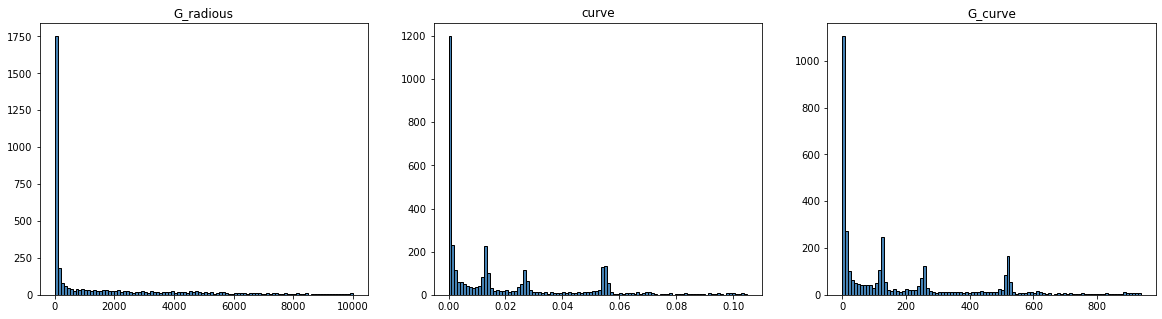

In [7]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
plt.hist(x = df.G_radious, bins = 100,color = 'steelblue',edgecolor = 'black')
plt.title("G_radious")
plt.subplot(132)
plt.hist(x = df.curve, bins = 100, color = 'steelblue', edgecolor = 'black' )
plt.title("curve")
plt.subplot(133)
plt.hist(x = df.G_curve, bins = 100,color = 'steelblue',edgecolor = 'black')
plt.title("G_curve")
# plt.show()



In [8]:
# L=1
# H=2500
# plt.figure(figsize = (20,10))
# plt.plot(df.iloc[L:H,0],df.iloc[L:H,1])
# plt.show

差分计算gradient curve

In [9]:
G_step=1
col = 5
def gradient( x ):
   # d = np.abs(df.iloc[x+G_step,col]-df.iloc[x-G_step,col]+df.iloc[x+1,col]-df.iloc[x-1,col])
   d = df.iloc[x+G_step,col]-df.iloc[x-G_step,col]+df.iloc[x+1,col]-df.iloc[x-1,col]
   return(d)

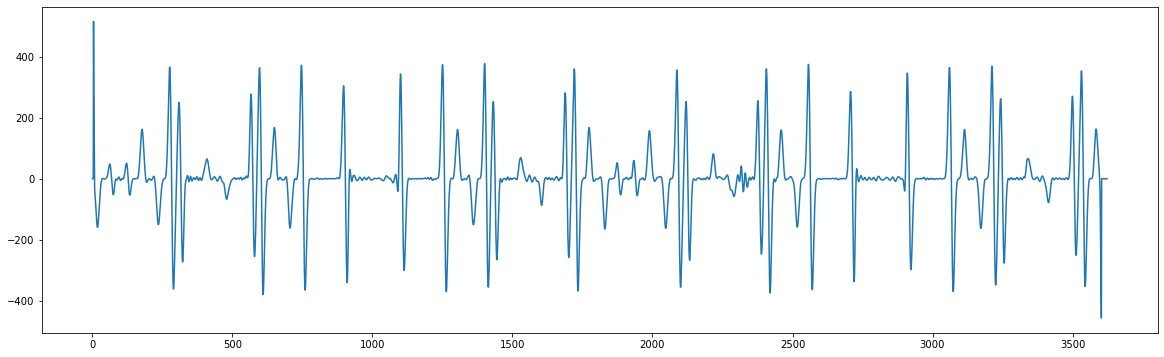

In [10]:
for i in range(1,df.shape[0]-G_step):
    
    df.iloc[i,6] = gradient(i)
G3 = [0.1,0.1,0.2,0.3,0.2,0.1,0.1]
for i in range(4,df.shape[0]-STEP*2):
    df.iloc[i,7] = np.dot(G3,df.iloc[i-3:i+4,6])# column 6
plt.figure(figsize=(20,6))
# plt.plot(df.gradient_curve)
plt.plot(df.G_gradient_curve) # column 7
plt.show()

# parameters   - 依据曲率和曲率的差分分段

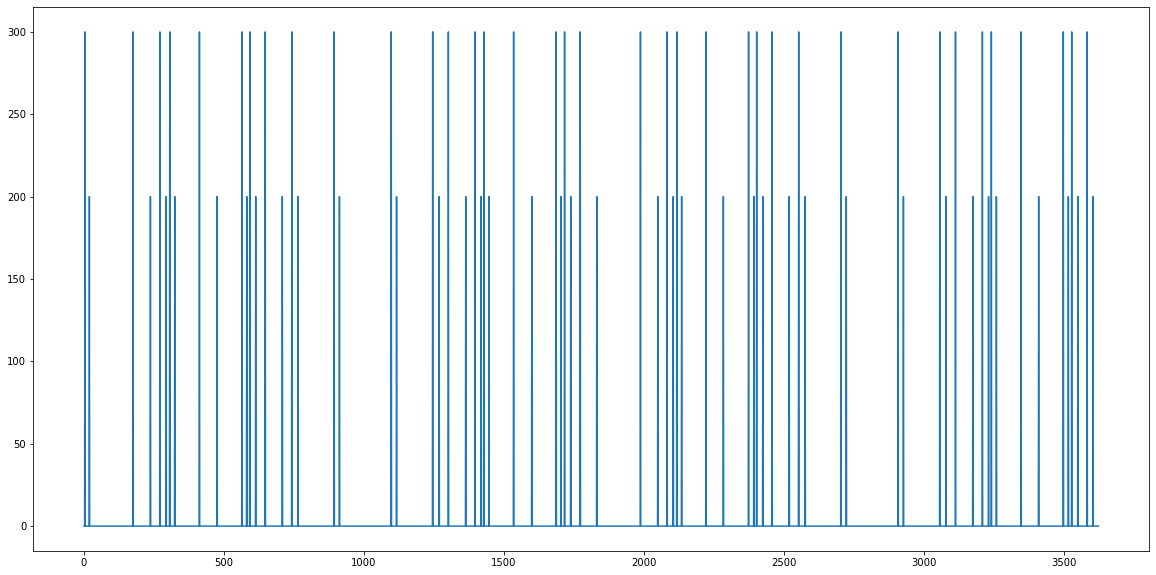

In [11]:
column = 7#Gradient curve
col1 = 5#g_ curve
threshold_gradient =100#2-230
threshold_Gcurve  =200#2-200
note1 = 500
note2 = 300
note3 = 200
for i in range(2,df.shape[0]-2):
    if ((df.iloc[i-1,column]<-threshold_gradient)and(df.iloc[i+1,column]>threshold_gradient)and(df.iloc[i,col1]>threshold_Gcurve)and(df.iloc[i-1,8]==0)and(df.iloc[i-2,8]==0)):
        df.iloc[i,8]=note1
    # if (((df.iloc[i-1,column]>threshold_gradient)and(df.iloc[i+1,column]>threshold_gradient)and(df.iloc[i+1,column]<threshold_gradient))and(df.iloc[i-1,8]==0)and(df.iloc[i-2,8]==0)):
    #     df.iloc[i,8]=note
    if ((df.iloc[i-1,col1]<threshold_Gcurve)and(df.iloc[i+1,col1]>threshold_Gcurve)and(df.iloc[i-1,8]==0)and(df.iloc[i-2,8]==0)): 
         df.iloc[i,8]=note2
    if ((df.iloc[i-1,col1]>threshold_Gcurve)and(df.iloc[i+1,col1]<threshold_Gcurve)and(df.iloc[i-1,8]==0)and(df.iloc[i-2,8]==0)): 
         df.iloc[i,8]=note3
plt.figure(figsize = (20,10))
plt.plot(df.breakpoint)
plt.show()
# df.describe()

# 展示

3624


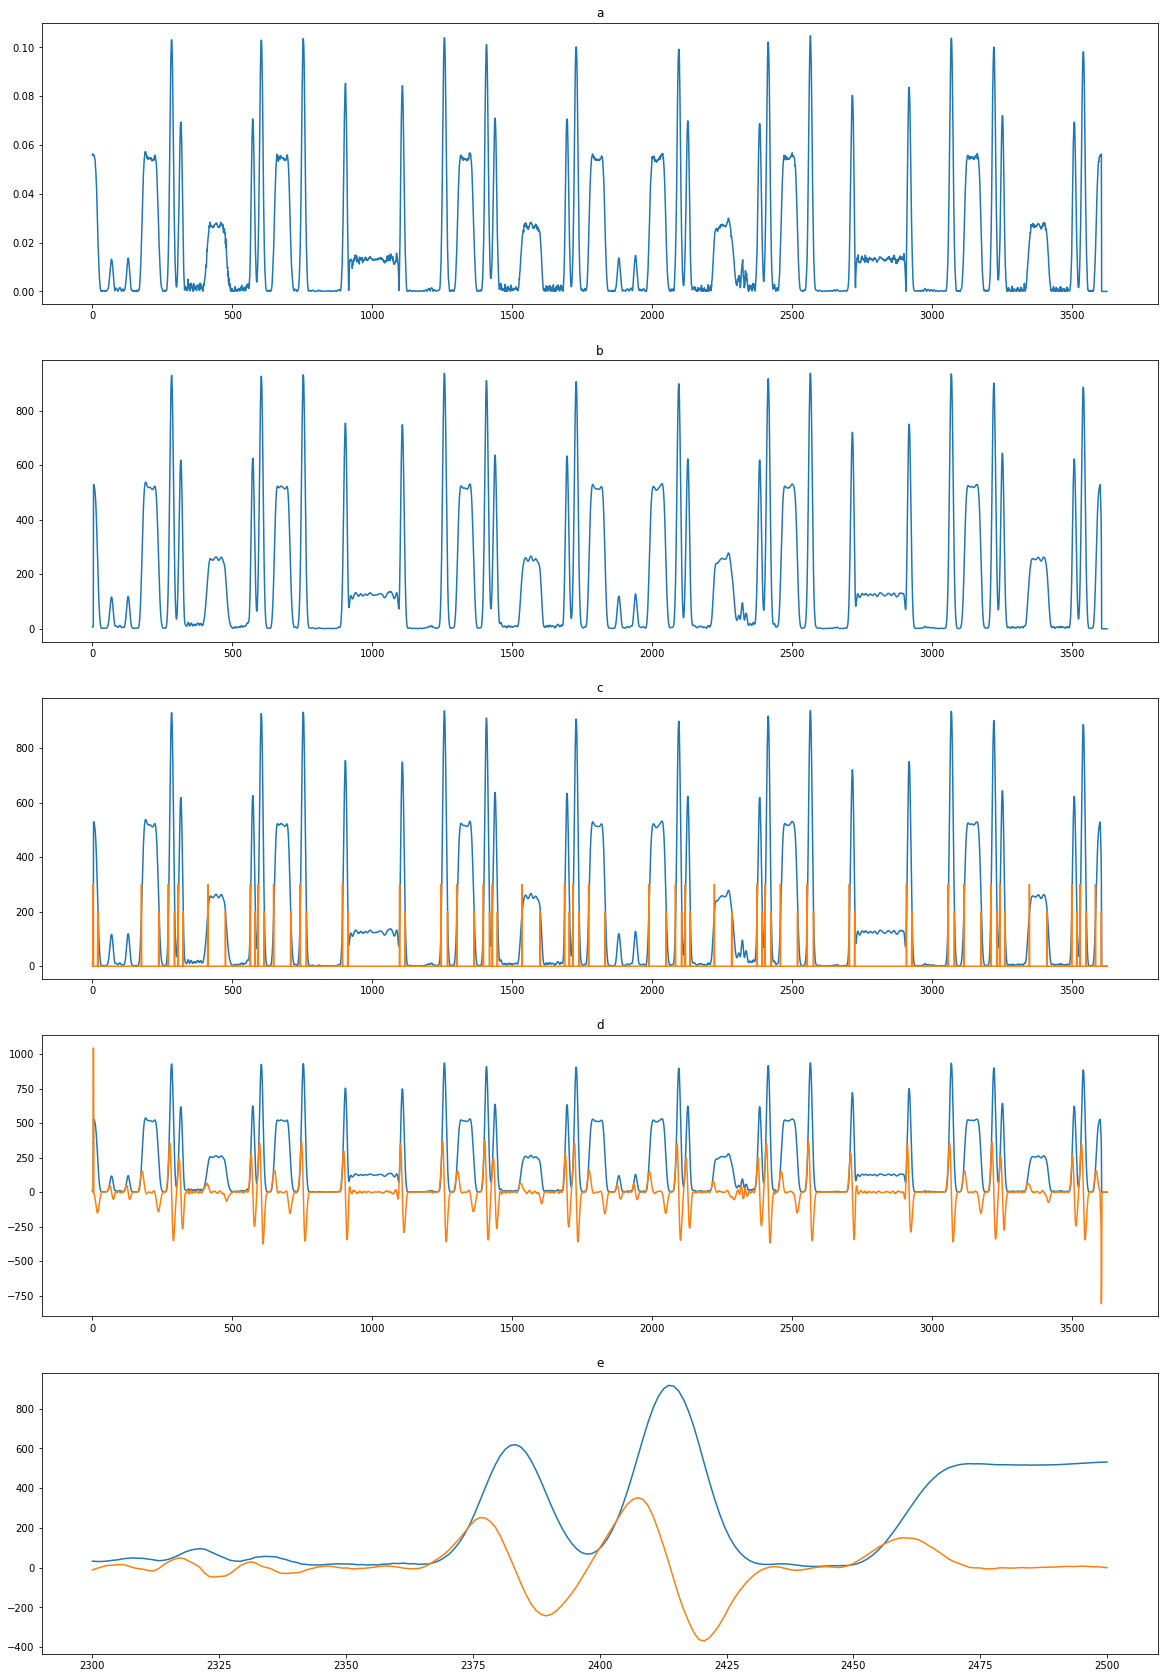

In [12]:
size = df.shape[0]
print(size)
plt.figure(figsize = (20,30))
# plt.subplots_adjust(hspace =0.6)
a = np.linspace(0,size,size)
b = df.G_radious
c = df.iloc[2300:2500,5]
j = df.iloc[2300:2500,6]
d = df.curve
f = df.G_curve
e = np.linspace(2300,2500,200)
k=510
plt.subplot(511)
plt.plot(a,d)
plt.title('a')


plt.subplot(512)
plt.plot(a,f)
plt.title('b')


plt.subplot(513)
plt.plot(a,f)
plt.plot(a,df.breakpoint)
plt.title('c')

plt.subplot(514)
plt.plot(a,f)
plt.plot(a,df.gradient_curve)
plt.title('d')

plt.subplot(515)
plt.plot(e,c)
plt.plot(e,j)
plt.title('e')


plt.show()

### 消除紧邻点 + 建立breaklist

In [13]:
breaklist = np.zeros((300,2), dtype = int)
j = 0
l = 0
distance_limit =10   #parameter
for i in range(df.shape[0]):
    if(df.iloc[i,8]!=0):
        if(j!=0):
            if((i-breaklist[j-1,0])<distance_limit):
                df.iloc[i,8] = 0
            else:    
                breaklist[j,0] = i
                breaklist[j,1] = df.iloc[i,8]
                j = j + 1
        else:    
            breaklist[j,0] = i
            breaklist[j,1] = df.iloc[i,8]
            j = j + 1

print(breaklist)

[[   3  300]
 [  19  200]
 [ 175  300]
 [ 237  200]
 [ 271  300]
 [ 293  200]
 [ 306  300]
 [ 324  200]
 [ 412  300]
 [ 475  200]
 [ 564  300]
 [ 581  200]
 [ 592  300]
 [ 613  200]
 [ 647  300]
 [ 708  200]
 [ 742  300]
 [ 764  200]
 [ 893  300]
 [ 912  200]
 [1097  300]
 [1116  200]
 [1245  300]
 [1268  200]
 [1301  300]
 [1363  200]
 [1396  300]
 [1418  200]
 [1428  300]
 [1446  200]
 [1534  300]
 [1599  200]
 [1686  300]
 [1703  200]
 [1716  300]
 [1738  200]
 [1772  300]
 [1831  200]
 [1987  300]
 [2049  200]
 [2082  300]
 [2104  200]
 [2117  300]
 [2134  200]
 [2221  300]
 [2283  200]
 [2373  300]
 [2392  200]
 [2402  300]
 [2424  200]
 [2457  300]
 [2518  200]
 [2552  300]
 [2575  200]
 [2703  300]
 [2722  200]
 [2907  300]
 [2926  200]
 [3056  300]
 [3078  200]
 [3112  300]
 [3174  200]
 [3208  300]
 [3230  200]
 [3240  300]
 [3258  200]
 [3346  300]
 [3409  200]
 [3497  300]
 [3515  200]
 [3527  300]
 [3549  200]
 [3582  300]
 [3603  200]
 [   0    0]
 [   0    0]
 [   0    0]

# 展示分割点位置

<function matplotlib.pyplot.show(close=None, block=None)>

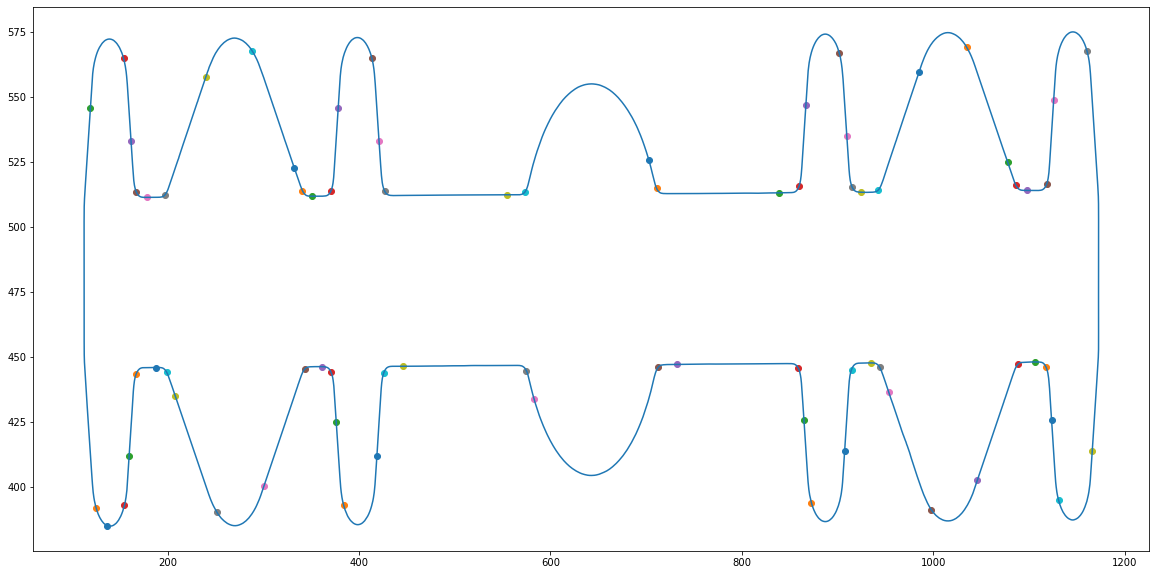

In [14]:
L=1
H=3886
plt.figure(figsize = (20,10))
plt.plot(df.iloc[L:H,0],df.iloc[L:H,1])
for i in range (df.shape[0]):
    if(df.iloc[i,8]!=0):
        plt.scatter(df.iloc[i,0],df.iloc[i,1])

plt.show

In [15]:
# df.describe()

In [16]:
# df.head(5)

# 求断点间隔的曲率均值

In [17]:
marker = 0
lower_bound=0
mean_value = 0
T = 250  #important para
for i in range(breaklist.shape[0]):
    if(breaklist[i,0]!=0):
        upper_bound = breaklist[i,0]
        sum  = 0 
        for j in range(lower_bound,upper_bound):
             sum += df.iloc[j,5]
        mean_value = sum /(upper_bound-lower_bound)
        for j in range(lower_bound,upper_bound-1):
            df.iloc[j,9] = mean_value
        lower_bound = upper_bound
        i+=1
        upper_bound = breaklist[i,0]

    else: break
s = breaklist.shape[0]
for i in range(s):
    if (breaklist[s-i-1,0]==0):
        breaklist = np.delete(breaklist,s-i-1,axis=0)

# print(df)
# df.describe()
print(breaklist)

[[   3  300]
 [  19  200]
 [ 175  300]
 [ 237  200]
 [ 271  300]
 [ 293  200]
 [ 306  300]
 [ 324  200]
 [ 412  300]
 [ 475  200]
 [ 564  300]
 [ 581  200]
 [ 592  300]
 [ 613  200]
 [ 647  300]
 [ 708  200]
 [ 742  300]
 [ 764  200]
 [ 893  300]
 [ 912  200]
 [1097  300]
 [1116  200]
 [1245  300]
 [1268  200]
 [1301  300]
 [1363  200]
 [1396  300]
 [1418  200]
 [1428  300]
 [1446  200]
 [1534  300]
 [1599  200]
 [1686  300]
 [1703  200]
 [1716  300]
 [1738  200]
 [1772  300]
 [1831  200]
 [1987  300]
 [2049  200]
 [2082  300]
 [2104  200]
 [2117  300]
 [2134  200]
 [2221  300]
 [2283  200]
 [2373  300]
 [2392  200]
 [2402  300]
 [2424  200]
 [2457  300]
 [2518  200]
 [2552  300]
 [2575  200]
 [2703  300]
 [2722  200]
 [2907  300]
 [2926  200]
 [3056  300]
 [3078  200]
 [3112  300]
 [3174  200]
 [3208  300]
 [3230  200]
 [3240  300]
 [3258  200]
 [3346  300]
 [3409  200]
 [3497  300]
 [3515  200]
 [3527  300]
 [3549  200]
 [3582  300]
 [3603  200]]


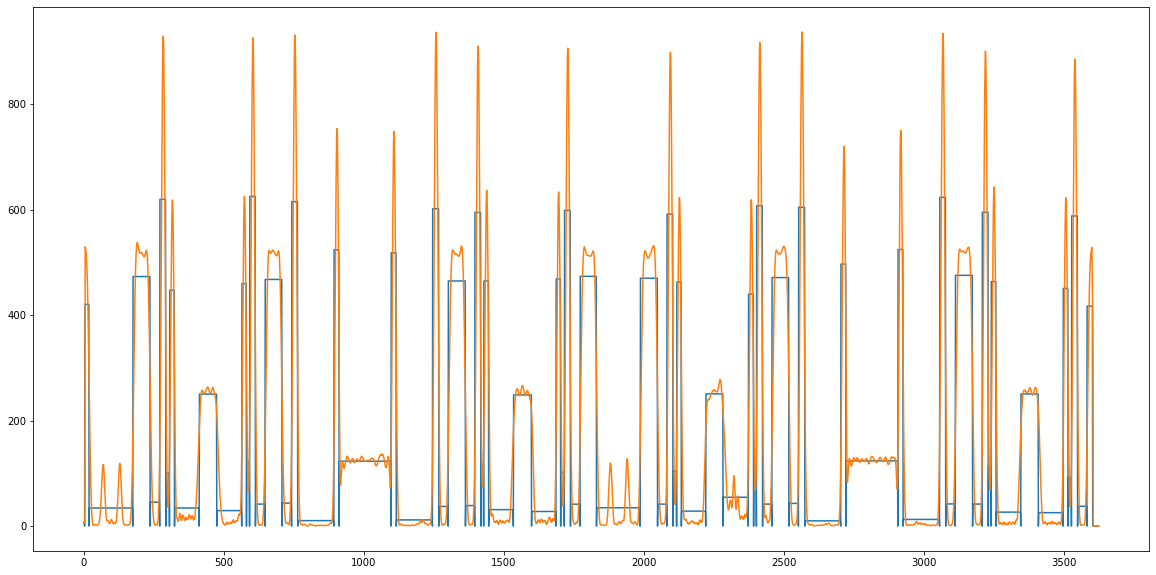

In [18]:
# size = df.shape[0]
# a = np.linspace(0,size,size)
plt.figure(figsize = (20,10))
plt.plot(a,df.mean_curve)#mean
plt.plot(a,df.iloc[:,5])
# print(df.mean_curve)

# 对于任意两个间隔点之间曲率均值超过阈值T 的 标记为用曲线拟合 marker =1

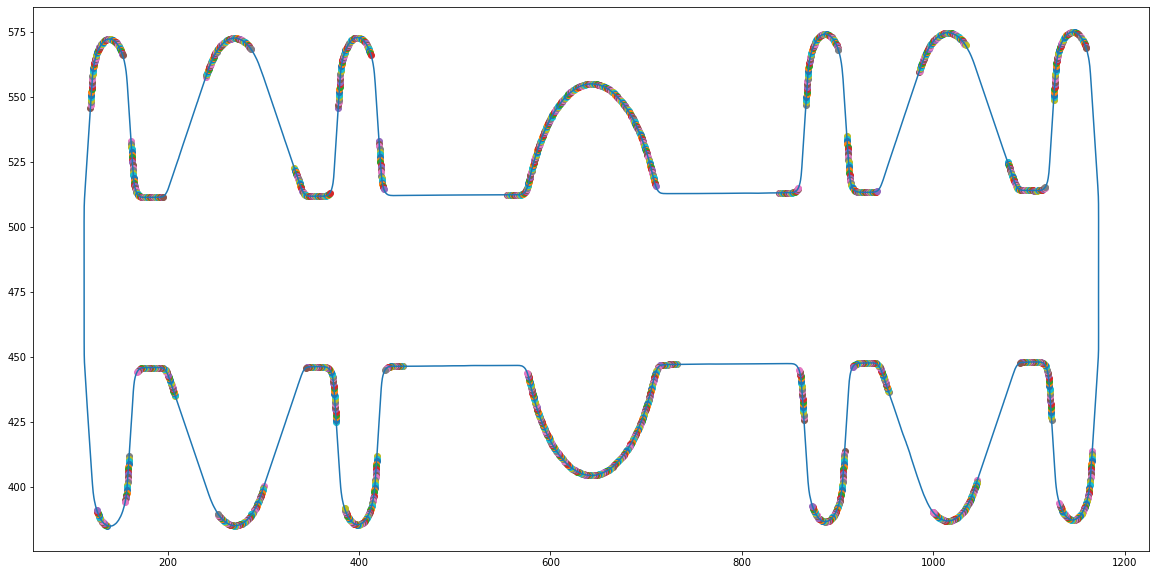

In [19]:
T = 80
for i in range(df.shape[0]):
    if(df.iloc[i,9]>T):
        df.iloc[i,10] = 1
    else : df.iloc[i,10] = 0
# draw curves
L=1
H=df.shape[0]
plt.figure(figsize = (20,10))
plt.plot(df.iloc[L:H,0],df.iloc[L:H,1])
for i in range (df.shape[0]):
    if(df.iloc[i,10]==1):
        plt.scatter(df.iloc[i,0],df.iloc[i,1])

# savedata

## save df

In [20]:
breakdot = pd.DataFrame(df)

writer = pd.ExcelWriter('dfcontour20.xlsx')		# 写入Excel文件
breakdot.to_excel(writer, float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()

writer.close()

D:\softwares\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


## save breaklist

In [21]:
breakdot = pd.DataFrame(breaklist)

w = pd.ExcelWriter('breaklist20.xlsx')		# 
breakdot.to_excel(w, float_format='%.5f')		# ‘page_1’是写入excel的sheet名
w.save()

writer.close()